In [34]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [2]:
# Use Breast Cancer dataset
dataset = datasets.load_breast_cancer()
x = dataset.data
y = dataset.target


x[0]


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [3]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x[0]

# The data was in different orders of magnitude and now they are all close to exp1

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

## K-means


### Elbow method


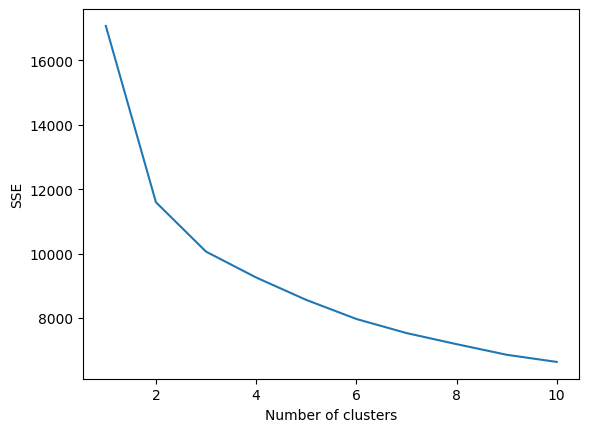

In [4]:
# Calculate clusters by elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(k, n_init=10, max_iter=1000).fit(x)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# From the graph, it is not very clear if I should choose 2 or 3 clusters, but probably 2,
# since the drop from 1-2 is way larger than 2-3

### Silhouette

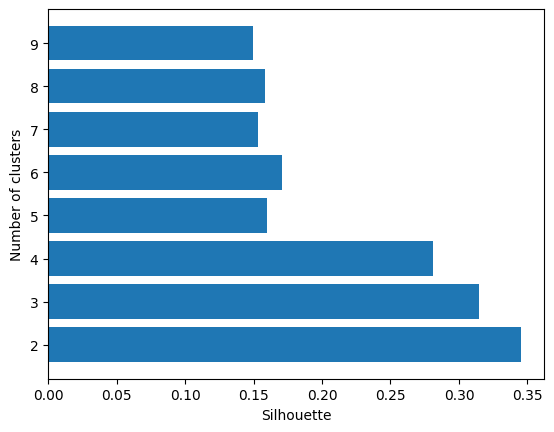

Best number of clusters is: 2


In [26]:
s = {}
max_s = 0
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(x)
    s_score = silhouette_score(x, labels=kmeans.labels_)
    s[k] = s_score
    if s_score > max_s:
        max_s = s_score
        best_k = k

plt.figure()
plt.barh(list(s.keys()), list(s.values()))
plt.xlabel('Silhouette')
plt.ylabel('Number of clusters')
plt.show()

print(f"Best number of clusters is: {best_k}")

# The sillhoute shows that the better number of clusters is two even though the silhouettes of 2 and 3 clusters are very close

## Visualizing K-means results in 2-d and 3-d graphs

In [7]:
# Visualizing the clusters using PCA
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=10000).fit(x)

init_notebook_mode(connected=True)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

x_df = pd.DataFrame(x)
x_df.columns = dataset.feature_names
clusters = kmeans.labels_
x_df['Cluster'] = clusters

PCs_2d = pd.DataFrame(pca_2d.fit_transform(x_df.drop(["Cluster"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d = pd.DataFrame(pca_3d.fit_transform(x_df.drop(['Cluster'], axis=1)))
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

x_df = pd.concat([x_df, PCs_2d, PCs_3d], axis=1, join='inner')

cluster0 = x_df[x_df["Cluster"] == 0]
cluster1 = x_df[x_df["Cluster"] == 1]

#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
data = [trace1, trace2]

title = 'Breast Cancer 30 dimensional data in 2-d graph'
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [10]:

trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = title.replace('2', '3')
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# K-medoids

### Elbow method 

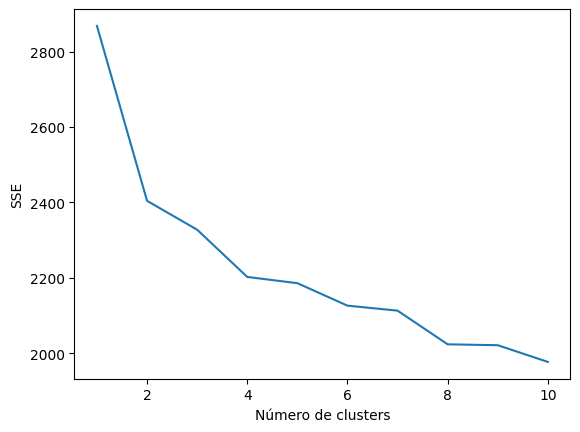

In [20]:
sse = {}
for k in range(1, 11):
    k_medoids = KMedoids(n_clusters=k, init='k-medoids++').fit(x)
    sse[k] = k_medoids.inertia_    

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel('SSE')
plt.show()

# With k-medoids it's harder to know the best number of clusters using the elbow method

### Silhouette


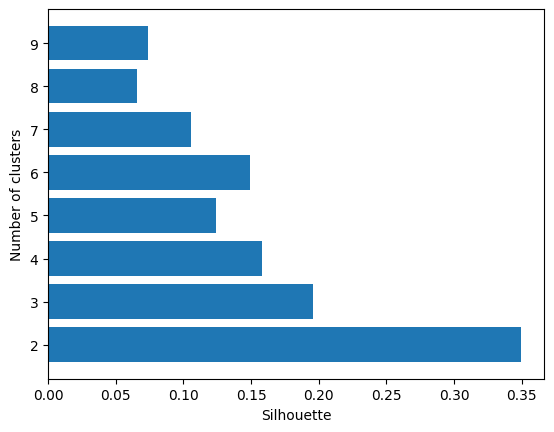

Best number of clusters is: 2


In [24]:
s = {}
max_s = 0
for k in range(2,10):
    kmedoids = KMedoids(n_clusters=k, init='k-medoids++').fit(x)
    s_score = silhouette_score(x, labels=kmedoids.labels_)
    s[k] = s_score
    if s_score > max_s:
        max_s = s_score
        best_k = k

plt.figure()
plt.barh(list(s.keys()), list(s.values()))
plt.xlabel('Silhouette')
plt.ylabel('Number of clusters')
plt.show()

print(f"Best number of clusters is: {best_k}")

# With k-medoids it is even clearer using the silhouette method that the best number of clusters is 2.


### DBSCAN
Using this [article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) to determine the best parameters

Number of clusters with eps 3.5 is 1
Number of clusters with eps 3.75 is 1
Number of clusters with eps 4.0 is 1
Number of clusters with eps 4.25 is 1
Number of clusters with eps 4.5 is 1
Number of clusters with eps 4.75 is 1


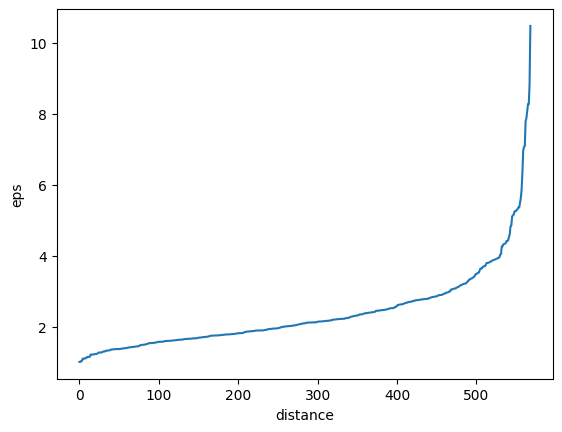

In [76]:
min_samples = len(dataset.feature_names) * 2

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.xlabel('distance')
plt.ylabel('eps')
plt.plot(distances)
# The best eps is around 4 based on the graph (Elbow method)

for eps in np.arange(3.5, 5, 0.25):
    dbscan = DBSCAN(min_samples=min_samples, eps=eps).fit(x)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    print(f"Number of clusters with eps {eps} is {n_clusters}")

